In [2]:
# Import packages
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import CSV
full_df = pd.read_csv('medical_clean.csv')

In [4]:
# List columns
full_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [5]:
# Reduce dataset to necessary columns related to research question
columns = ['Lat', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 
                   'VitD_levels']
df = full_df[columns]

# Check for null values

In [6]:
# Initial check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lat          10000 non-null  float64
 1   Population   10000 non-null  int64  
 2   Area         10000 non-null  object 
 3   Children     10000 non-null  int64  
 4   Age          10000 non-null  int64  
 5   Income       10000 non-null  float64
 6   Marital      10000 non-null  object 
 7   Gender       10000 non-null  object 
 8   VitD_levels  10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [7]:
# Check for abnormal representations of null values. Also helps with checking for partial duplicates.
for col in columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print()
    print()

Lat
36.06702    4
33.34798    4
35.25512    4
39.38610    4
37.86890    4
           ..
41.00911    1
39.20560    1
46.36035    1
34.96563    1
40.49998    1
Name: Lat, Length: 8588, dtype: int64


Population
0        109
195       14
115       11
178       11
285       11
        ... 
8092       1
11147      1
27175      1
7371       1
41524      1
Name: Population, Length: 5951, dtype: int64


Area
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64


Children
0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: Children, dtype: int64


Age
47    161
52    159
74    159
41    157
86    156
     ... 
63    123
51    122
20    120
36    118
80    116
Name: Age, Length: 72, dtype: int64


Income
14572.40    2
20474.03    2
37132.97    2
29508.62    2
24997.02    2
           ..
41900.29    1
35093.92    1
44848.08    1
20815.96    1
62682.63    1
Name: Income, Length: 9993, dtype: int64


M

# Check for duplicates

In [26]:
# Check for complete duplicates
if df.duplicated().any():
    print('Has complete duplicates')
else:
    print('No complete duplicates')

No complete duplicates


# Check for outliers

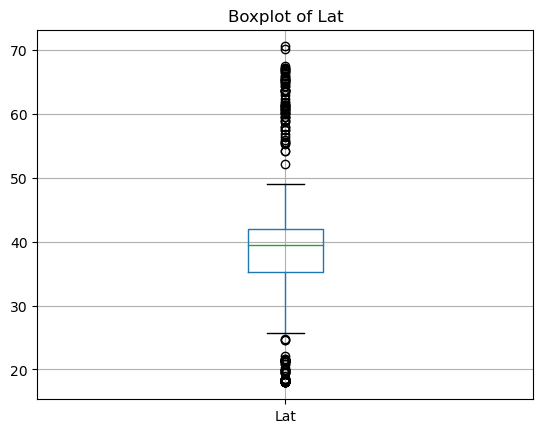

Lat has 150 outliers


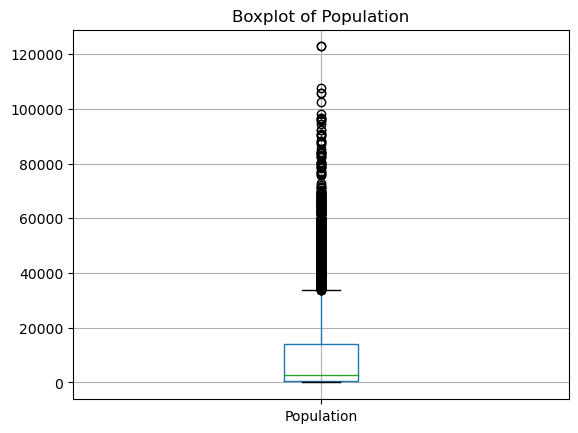

Population has 855 outliers

Value counts for Area
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64



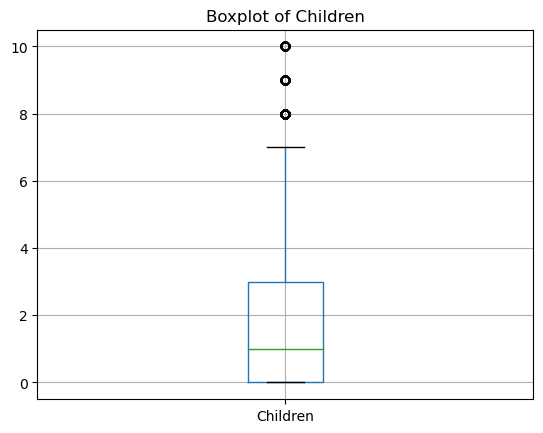

Children has 411 outliers


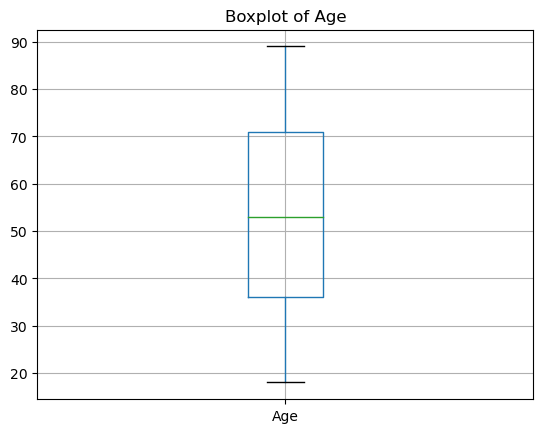

Age has 0 outliers


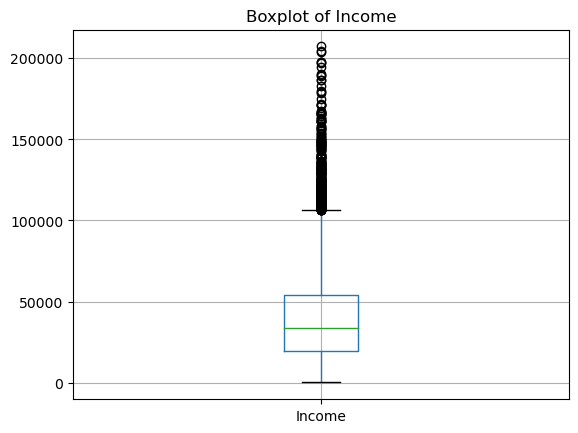

Income has 326 outliers

Value counts for Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64


Value counts for Gender
Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64



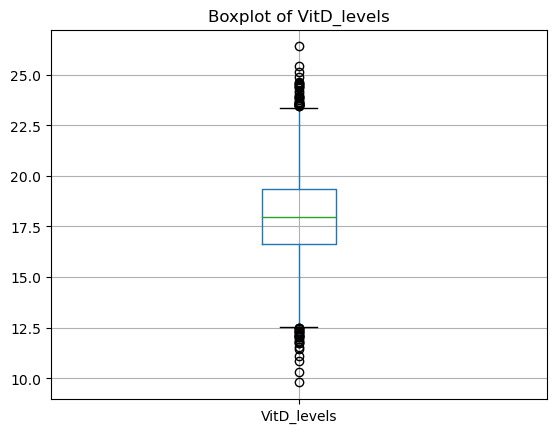

VitD_levels has 60 outliers


In [22]:
# Create boxplot and if outliers exist, calculate using IQR method
for col in columns:
    if df[col].dtype != 'object':
        # Create boxplot
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()
        
        # Calculate IQR lower and upper bounds to determine outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count and display outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        print(f"{col} has {num_outliers} outliers")
        
    else:
        # For categorical variables, determine if any category makes up a small percentage
        print()
        print(f'Value counts for {col}')
        print(df[col].value_counts())
        print()

# Summary Statistics

In [9]:
# Produce summary statistics for each variable
for col in columns:
    print(f'Summary statistics for {col}')
    print(df[col].describe())
    print()

Summary statistics for Lat
count    10000.000000
mean        38.751099
std          5.403085
min         17.967190
25%         35.255120
50%         39.419355
75%         42.044175
max         70.560990
Name: Lat, dtype: float64

Summary statistics for Population
count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

Summary statistics for Area
count     10000
unique        3
top       Rural
freq       3369
Name: Area, dtype: object

Summary statistics for Children
count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

Summary statistics for Age
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000


# Univariate Visualizations

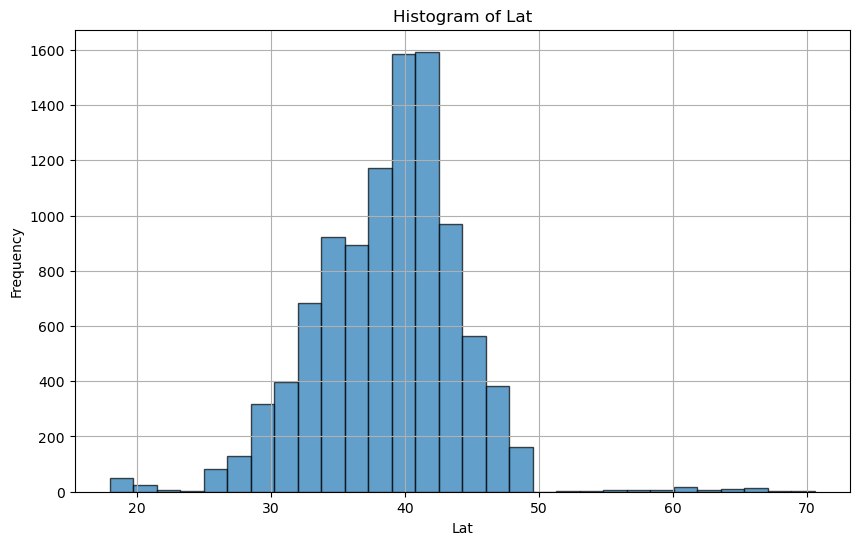

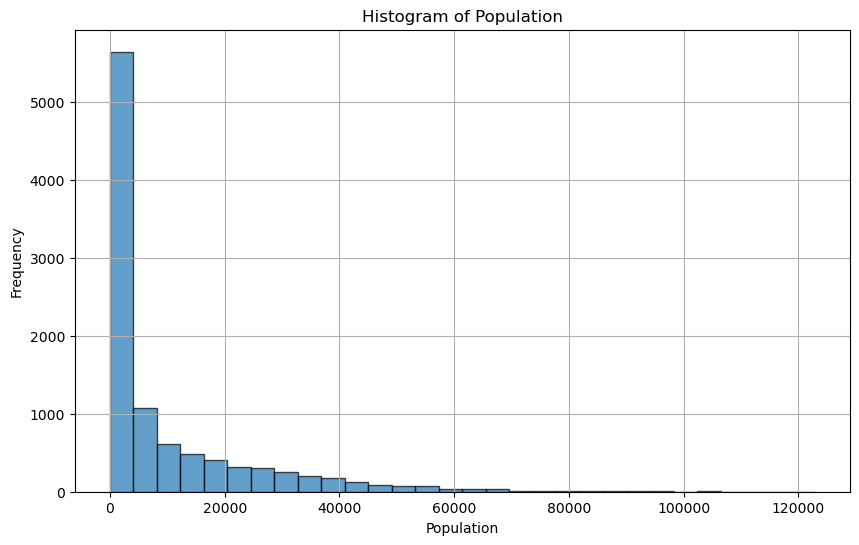

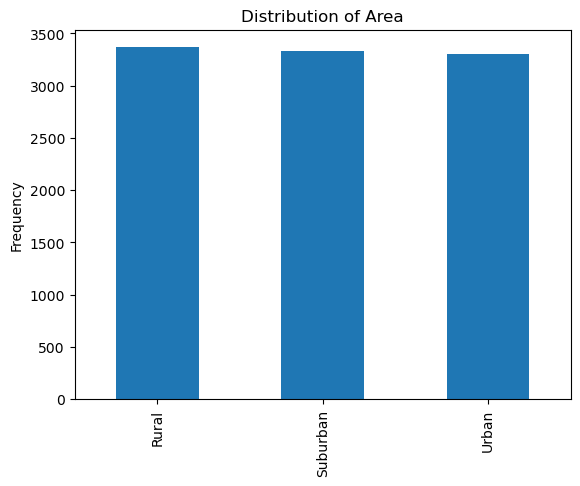

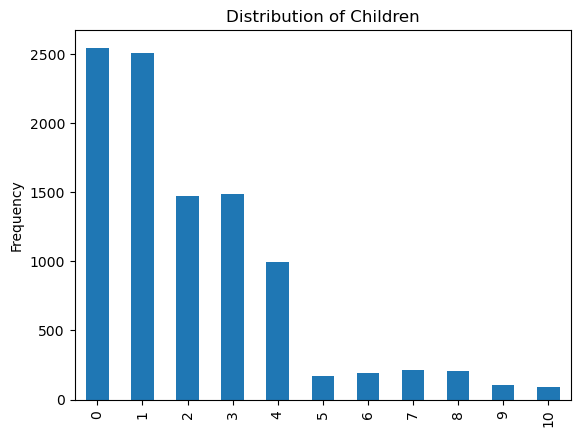

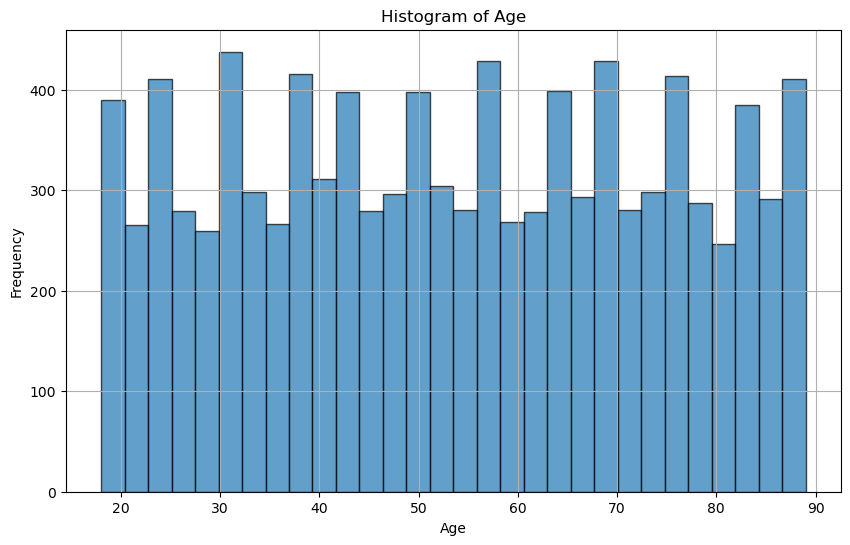

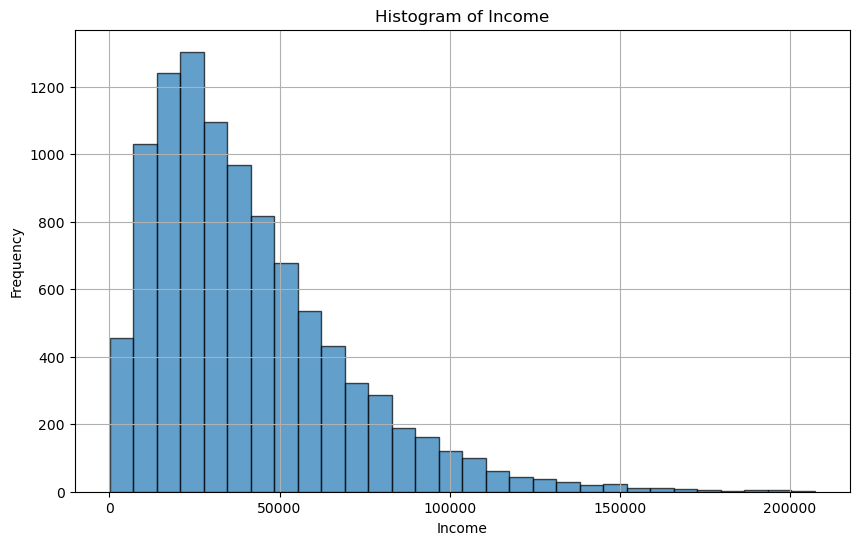

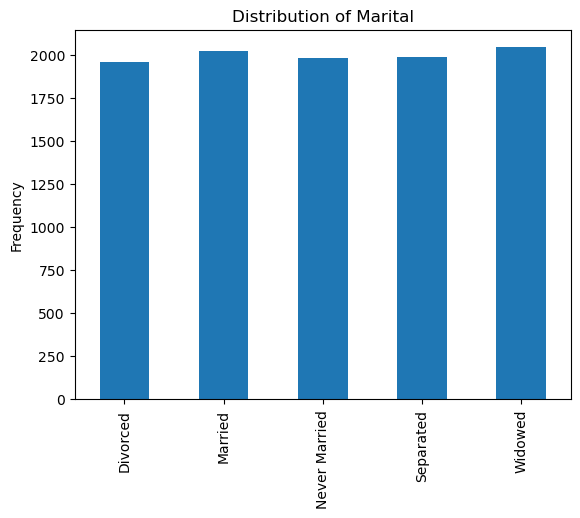

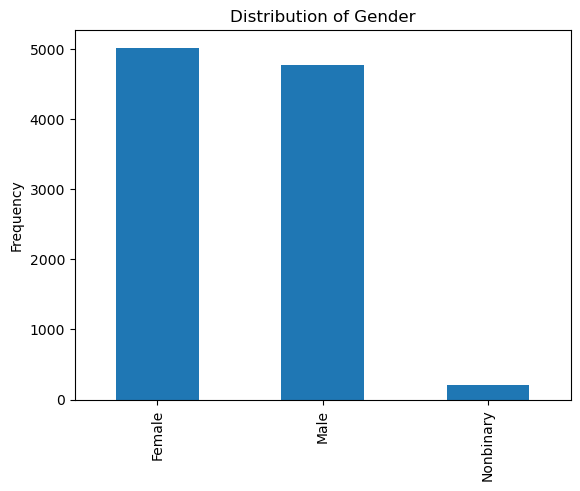

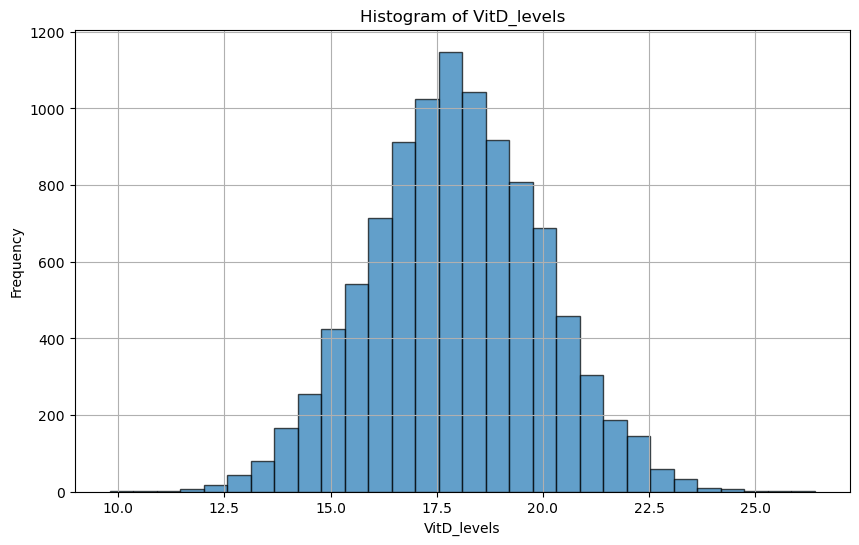

In [14]:
# Create univariate visualizations for each variable
for col in columns:
    if (df[col].dtype != 'object') & (col != 'Children'):
        plt.figure(figsize=(10, 6))
        plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        value_counts = df[col].value_counts().sort_index()
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.show()

# Bivariate Visualizations

Lat


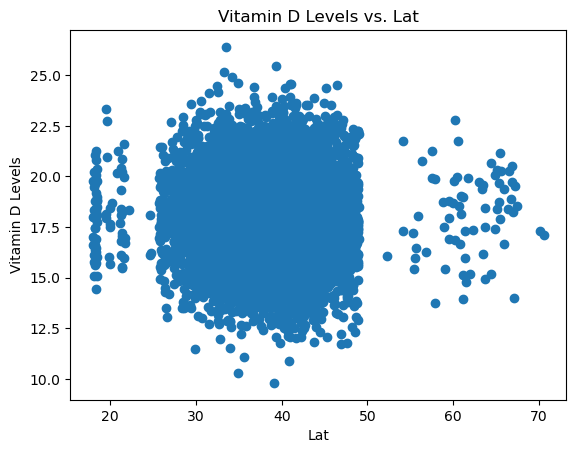

Population


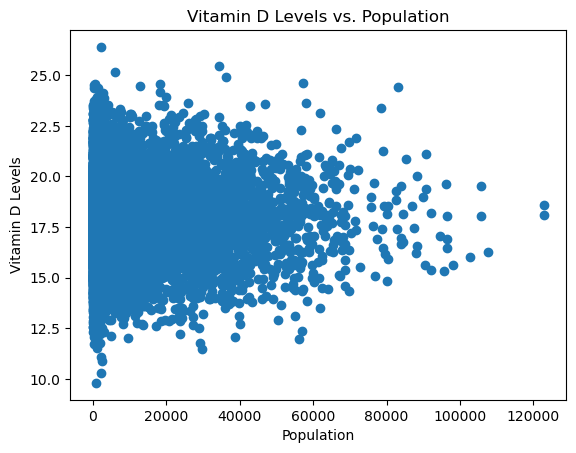

boxplot Area


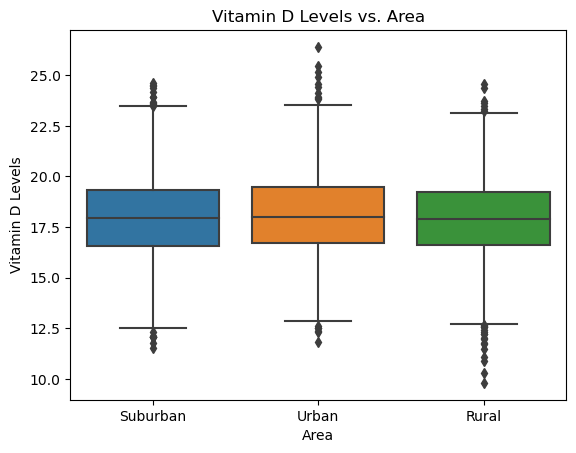

Children


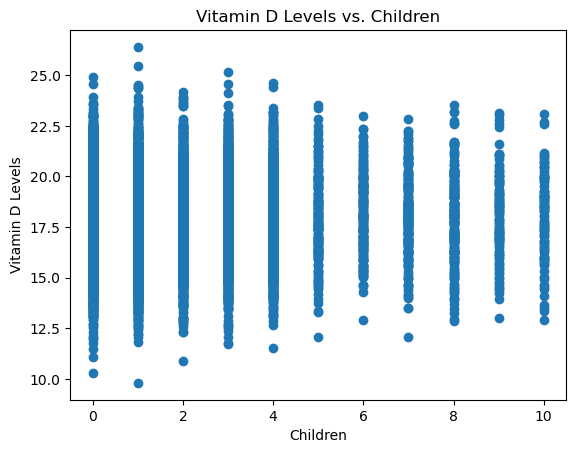

Age


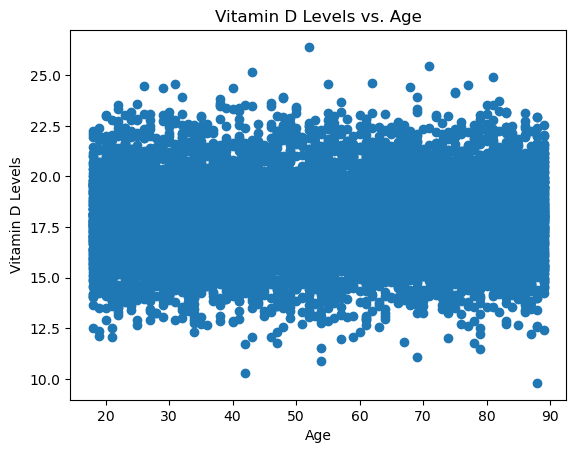

Income


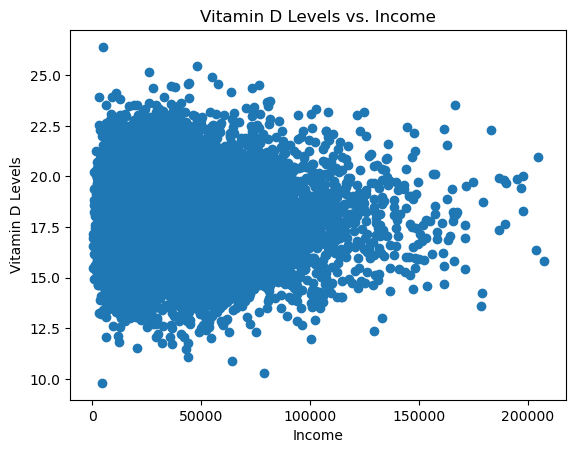

boxplot Marital


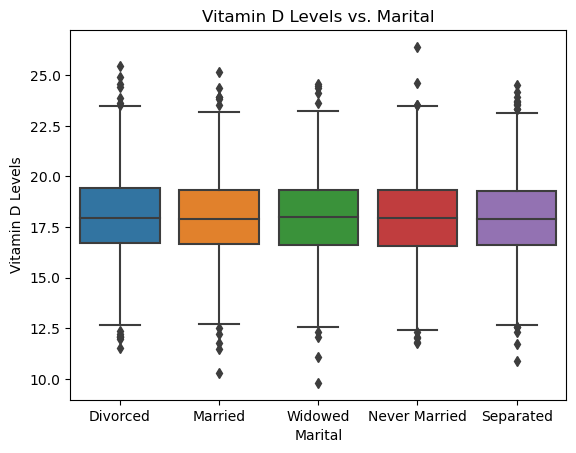

boxplot Gender


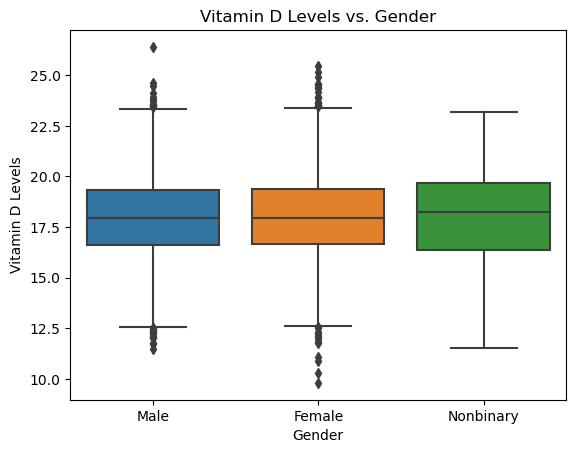

boxplot VitD_levels


In [ ]:
# Create bivariate visualizations for each dependent/independent variable combination
for col in columns:
    if col != 'VitD_levels':
    if (df[col].dtype != 'object':
        print(col)
        plt.scatter(df[col], df['VitD_levels'])
        plt.title(f'Vitamin D Levels vs. {col}')
        plt.xlabel(col)
        plt.ylabel('Vitamin D Levels')
        plt.show()
    else:
        print(f'boxplot {col}')
        sns.boxplot(x=col, y='VitD_levels', data=df)
        plt.title(f'Vitamin D Levels vs. {col}')
        plt.ylabel('Vitamin D Levels')
        plt.show()

# Modeling

In [43]:
for col in columns:
    mdl_vitd_vs_col = ols(f'VitD_levels ~ {col}', data=df).fit()
    print(mdl_vitd_vs_col.params)

Intercept    17.942655
Lat           0.000558
dtype: float64
Intercept     1.796067e+01
Population    3.607767e-07
dtype: float64
Intercept           17.893829
Area[T.Suburban]     0.047290
Area[T.Urban]        0.165592
dtype: float64
Intercept    17.945712
Children      0.008845
dtype: float64
Intercept    17.910309
Age           0.001008
dtype: float64
Intercept    1.800182e+01
Income      -9.275918e-07
dtype: float64
Intercept                   17.990831
Marital[T.Married]          -0.018193
Marital[T.Never Married]    -0.049274
Marital[T.Separated]        -0.026518
Marital[T.Widowed]          -0.038355
dtype: float64
Intercept              17.985853
Gender[T.Male]         -0.049493
Gender[T.Nonbinary]     0.093767
dtype: float64
Intercept      1.522805e-14
VitD_levels    1.000000e+00
dtype: float64


In [44]:
df.columns

Index(['Lat', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'VitD_levels'],
      dtype='object')

In [48]:
mdl_vitd_vs_all = ols(f'VitD_levels ~ Lat + Population + Area + Children + Age + Income + Marital + Gender + 0', data=df).fit()
print(mdl_vitd_vs_all.params)

Area[Rural]                 1.787290e+01
Area[Suburban]              1.791776e+01
Area[Urban]                 1.803873e+01
Marital[T.Married]         -1.867213e-02
Marital[T.Never Married]   -4.555199e-02
Marital[T.Separated]       -2.548734e-02
Marital[T.Widowed]         -3.934588e-02
Gender[T.Male]             -4.805587e-02
Gender[T.Nonbinary]         8.675544e-02
Lat                         7.928710e-04
Population                  3.836999e-07
Children                    8.914303e-03
Age                         1.001986e-03
Income                     -9.439829e-07
dtype: float64


# Visualizations

In [ ]:
for col in columns:
    if df[col].dtype != 'object':
        sns.regplot(x=col, y='VitD_levels', data=df, ci=None, line_kws={'color':'black'})
        plt.show()
    else:
        sns.boxplot(x=col, y='VitD_levels', data=df)
        plt.show()